Int64Index([2847], dtype='int64')
OBSTETRICS & GYNECOLOGY
0    2582
1     728
2     114
Name: Ntm_Speciality_MyBuckets, dtype: int64


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


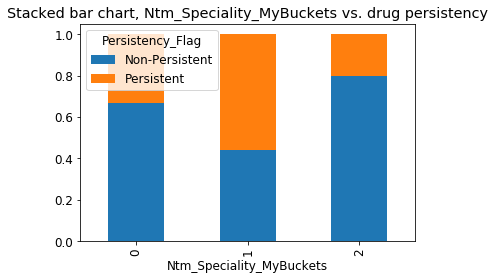

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', size = 12)


health = pd.read_csv('Healthcare_data_updated.csv', header = 0)  #this is the updated file with the more useable Age_Category




#One column has a comma in the middle of its name so I altered that col name (it was causing problems when I plotted)
health=health.rename(columns = {'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'})


#create a column that flags when the value of Dexa_Freq_During_Rx is <=2  - these are disproportionately non-persistent
#this will become a new column for classification purposes
Dexa_Freq_During_Rx_Bucket_Flag = list()
for i in range(0,3424):
    result = 0
    if health['Dexa_Freq_During_Rx'][i] <= 2:
        result = 1
    Dexa_Freq_During_Rx_Bucket_Flag.append(result)
    

#correct the entry with the odd version of OB GYN name on specialities field
print(health.index[health['Ntm_Speciality'] == 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'])
health.set_value(2847,'Ntm_Speciality','OBSTETRICS & GYNECOLOGY')
print(health['Ntm_Speciality'][2847])

#insert new column that flags values for DexaFreqDuringRx associated with non-persistence
health.insert(15, 'Dexa_Freq_During_Rx_Bucket_Flag', Dexa_Freq_During_Rx_Bucket_Flag, True)


#insert a new column that flags Ntm Specialities with high rates of non-persistence
#this will become a new column for classification purposes
Ntm_Speciality_MyBuckets = list()
for i in range(0,3424):
    result = 0
    if health['Ntm_Speciality'][i] in ['ONCOLOGY', 'PEDIATRICS', 'PATHOLOGY', 'ENDOCRINOLOGY','VASCULAR SURGERY', 'HOSPICE AND PALLIATIVE MEDICINE', 'NEPHROLOGY', 'NEUROLOGY', 'NUCLEAR MEDICINE', 'PSYCHIATRY AND NEUROLOGY', 'PLASTIC SURGERY', 'RADIOLOGY']:
        result = 1
    if health['Ntm_Speciality'][i] in ['PAIN MEDICINE', 'ORTHOPEDIC SURGERY', 'PULMONARY MEDICINE', 'CARDIOLOGY', 'SURGERY AND SURGICAL SPECIALITIES', 'TRANSPLANT SURGERY', 'UROLOGY', 'EMERGENCY MEDICINE','HOSPITAL MEDICINE', 'OPTHALMOLOGY', 'OTOLARYNGOLOGY','PODIATRY', 'CLINICAL NURSE SPECIALIST']:
        result = 2
    Ntm_Speciality_MyBuckets.append(result)
    
health.insert(11, 'Ntm_Speciality_MyBuckets', Ntm_Speciality_MyBuckets, True)

#show bar chart for new column, Ntm speciality, my buckets
table = pd.crosstab(health.Ntm_Speciality_MyBuckets, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, Ntm_Speciality_MyBuckets vs. drug persistency')
#my own created buckets against drug persistency
print(health['Ntm_Speciality_MyBuckets'].value_counts())


#print(list(health.columns))   #to see updated column names
#print(health.shape)    #to see updated df size


In [14]:
#define the list of features (columns) to be used as predictors
#note this subset is constructed to create greater independence between columns and to eliminate unhelpful features based on bar charts of those features vs. drug persistency

features = ['Race', 'Region', 'Ntm_Speciality_MyBuckets', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 
            'Risk_Segment_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
            'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
            'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
            'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 
            'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 
            'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 
            'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 
            'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 
            'Risk_Immobilization']
X_cat = health[features]
y_cat = health.Persistency_Flag
print(health['Persistency_Flag'].head(5))
print(health[features].head(25))


#need to convert the Persistency column to numerical flag
#need to convert features to numerical variables (may require use of some dummy variables) to make amendable to log regression and random forest
#once these are converted we can define X and y based on the new, numerical cols and apply log reg

0        Persistent
1    Non-Persistent
2    Non-Persistent
3    Non-Persistent
4    Non-Persistent
Name: Persistency_Flag, dtype: object
             Race   Region  Ntm_Speciality_MyBuckets Gluco_Record_During_Rx  \
0       Caucasian     West                         0                      N   
1           Asian     West                         0                      N   
2   Other/Unknown  Midwest                         0                      N   
3       Caucasian  Midwest                         0                      Y   
4       Caucasian  Midwest                         0                      Y   
5       Caucasian  Midwest                         0                      N   
6       Caucasian  Midwest                         0                      N   
7       Caucasian  Midwest                         0                      Y   
8       Caucasian  Midwest                         0                      N   
9       Caucasian  Midwest                         0                    

In [15]:
# import the package as needed
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
# fit the model with data - cannot run it yet, until variables are transformed
#logreg.fit(X_train,y_train)

#
#y_pred=logreg.predict(X_test)